In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os

from fractions import Fraction
from tqdm import tqdm

from ksvz_models.catalogues import *
from ksvz_models.model_building import *

In [2]:
# Prepare Dyn and Cas

dicts = [{1:0,2:1/2,3:2,4:5,5:10,6:35/2,7:28,8:42},{1:0,3:1/2,6:5/2,8:3,10:15/2,15:10,152:35/2,21:35,24:25,27:27,28:63,35:105/2,36:105,42:119/2,45:165,48:98,55:495/2,60:115},{1:0,2:3/4,3:2,4:15/4,5:6,6:35/4,7:12,8:63/4},{1:0,3:4/3,6:10/3,8:3,10:6,15:16/3,152:28/3,21:40/3,24:25/3,27:8,28:126/7,35:12,36:70/3,42:34/3,45:88/3,48:49/3,55:36,60:46/3}]

for dict in dicts:
   d_new = {}
   for key in dict:
      d_new[key] = int(36*dict[key])
   print(d_new)

{1: 0, 2: 18, 3: 72, 4: 180, 5: 360, 6: 630, 7: 1008, 8: 1512}
{1: 0, 3: 18, 6: 90, 8: 108, 10: 270, 15: 360, 152: 630, 21: 1260, 24: 900, 27: 972, 28: 2268, 35: 1890, 36: 3780, 42: 2142, 45: 5940, 48: 3528, 55: 8910, 60: 4140}
{1: 0, 2: 27, 3: 72, 4: 135, 5: 216, 6: 315, 7: 432, 8: 567}
{1: 0, 3: 48, 6: 120, 8: 108, 10: 216, 15: 192, 152: 336, 21: 480, 24: 300, 27: 288, 28: 648, 35: 432, 36: 840, 42: 408, 45: 1056, 48: 588, 55: 1296, 60: 552}


In [3]:
i7 = get_max_index(7)
i8 = get_max_index(8)
print(i7, i8)
print(repinfo[i8])

e, n = encalc_times_36(np.array([1], dtype=int), repinfo)
print(repinfo[0][:3], e, n, Fraction(e, n))

106 126
[ 24   1  10   8 900   0 100 300   0 100]
[ 3  1 -2] 12 18 2/3


LP = 9.32e+38 GeV (g_1) (should be 9.3e38 GeV and g_1)


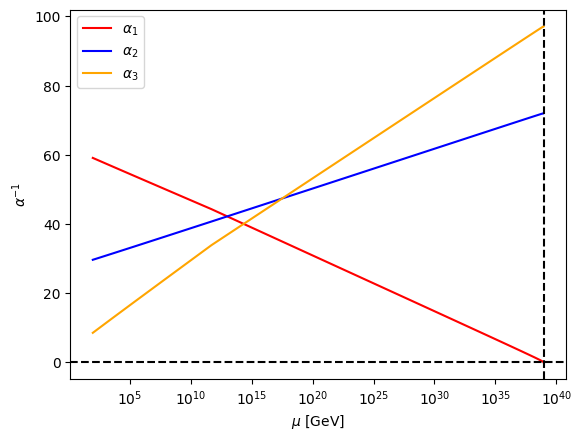

In [4]:
muLP, iLP = find_LP([1], mQ=5.0e11, plot=True)
print("LP = {:.2e} GeV (g_{:d}) (should be 9.3e38 GeV and g_1)".format(muLP,iLP+1))

In [6]:
mvals = np.logspace(6.7, 16.7, 21)
nq_max = 45

In [7]:
additive_catalogues(mvals, range(1,i8+2), nq_max=nq_max, lp_threshold=1e18)

Group NQ1 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ2 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ3 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ4 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ5 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ6 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ7 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ8 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ9 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ10 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ11 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ12 already exists in file output/data/add_KSVZ_models_m0.h5; skipping...
Group NQ13 already exists in file out

KeyboardInterrupt: 

In [8]:
print("NQ | Minimal dims")
print("-- | ------------")
for i in range(15):
   fname = f"output/data/add_KSVZ_models_m{i:d}.h5"
   with h5.File(fname, 'r') as f:
      models = f["NQ1"]["model"]
      minimal_dims = [min_dim_from_rep(m[0]) for m in models]
      print(f"{(i+1):02d} |", minimal_dims)

NQ | Minimal dims
-- | ------------
01 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6]
02 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6]
03 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7]
04 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7]
05 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7]
06 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7]
07 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7]
08 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7]
09 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7]
10 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7]
11 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7]
12 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7]
13 | [3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7]
14 |

In [9]:
create_full_catalogues(range(15), nq_max)

Group NQ1 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ2 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ3 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ4 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ5 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ6 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ7 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ8 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ9 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ10 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ11 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ12 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ13 already exists in file output/data/KSVZ_models_m0.h5; skipping...
Group NQ

KeyboardInterrupt: 